<a href="https://colab.research.google.com/github/ask-kawade/Mobile-Price-Range-Prediction--Classification-Problem/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem Statement:**
**In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.**
### **Data Description -**
* **Battery_power** - Total energy a battery can store in one time measured in mAh
* **Blue** - Has bluetooth or not
* ***Clock_speed*** - speed at which microprocessor executes instructions
* ***Dual_sim*** - Has dual sim support or not
* ***Fc*** - Front Camera mega pixels
* ***Four_g*** - Has 4G or not
* ***Int_memory*** - Internal Memory in Gigabytes
* ***M_dep*** - Mobile Depth in cm
* ***Mobile_wt*** - Weight of mobile phone
* ***N_cores*** - Number of cores of processor
* ***Pc*** - Primary Camera mega pixels
* ***Px_height*** - Pixel Resolution Height
* ***Px_width*** - Pixel Resolution Width
* ***Ram*** - Random Access Memory in Mega Bytes
* ***Sc_h*** - Screen Height of mobile in cm
* ***Sc_w*** - Screen Width of mobile in cm
* ***Talk_time*** - longest time that a single battery charge will last when you are
* ***Three_g*** - Has 3G or not
* ***Touch_screen*** - Has touch screen or not
* ***Wifi*** - Has wifi or not
* ***Price_range*** - This is the target variable with value of 
* 0(low cost), 
* 1(medium cost),
* 2(high cost) and
* 3(very high cost).
* Thus our target varibale has 4 categoires so basically it is a Multiclass classification problem.

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# setting max display column limit to 30
pd.set_option("display.max_columns", 30)

#set style
# plt.style.use('seaborn')
sns.set()


# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')

In [2]:
 # Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# CSV file loaction path
file_path= '/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECTS/Mobile Price Range Prediction/data_mobile_price_range.csv'

In [4]:
# importing csv file into Pandas dataframe.
mobile_data=pd.read_csv(file_path)

In [5]:
# first 5 rows
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
# Last 5 Rows of the data

mobile_data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [7]:
# lets Check the shape of data
print(mobile_data.shape)
print(f'Total Rows = {mobile_data.shape[0]}\nTotol Columns={mobile_data.shape[1]} ')

(2000, 21)
Total Rows = 2000
Totol Columns=21 


In [8]:
# Checking Statistic of the data
mobile_data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Some Basic Observations:
* We can see that sc_width and px_height has minimum value 0. which is not possible in any mobile. We need to handle this mismatch.

In [9]:
# Checking How many observations having px_hieght value as 0.
print(mobile_data[mobile_data['px_height']==0].shape[0])

2


In [10]:
# As there are only 2 observations having px_height=0. so we will drop it.
mobile_data=mobile_data[mobile_data['px_height']!=0]

## Nearest Neighbors Imputations (KNNImputer)

Missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors.

Let’s take the above example of the titanic dataset to see how it works.
* Before using KNN Imputer we need to replace 0 with NAN values. so that it will work.

In [11]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
mobile_data['sc_w']=mobile_data['sc_w'].replace(0,np.nan)

In [12]:
# import KNN imputer frio sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
mobile_data=pd.DataFrame(impute_knn.fit_transform(mobile_data),columns=mobile_data.columns)

In [13]:
# Checking shape
mobile_data.shape

(1998, 21)

In [14]:
# Checking How many observations having sc_w value as 0.
mobile_data[mobile_data['sc_w']==0].shape[0]

0

Thus we have handled the mismatched values of the data.

In [15]:
# Checking the datatypes, non null values
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   float64
 4   fc             1998 non-null   float64
 5   four_g         1998 non-null   float64
 6   int_memory     1998 non-null   float64
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        1998 non-null   float64
 10  pc             1998 non-null   float64
 11  px_height      1998 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1998 non-null   float64
 15  sc_w           1998 non-null   float64
 16  talk_time      1998 non-null   float64
 17  three_g        1998 non-null   float64
 18  touch_sc

* We don't have any object data type in our data set.
* Also we have Zero null values in data set.
* Price_range is our target variable.

In [16]:
# Checking Null values.
mobile_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

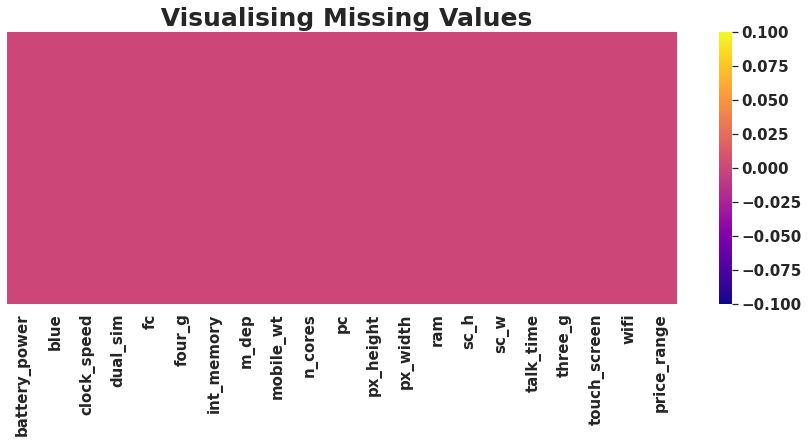

In [17]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(mobile_data.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

No Null values found. Which is good thing for us.

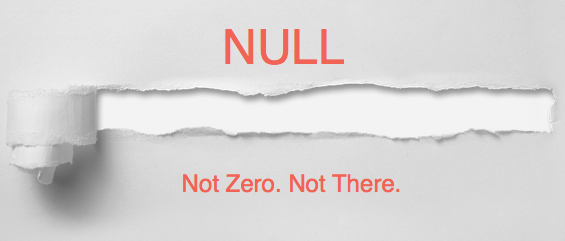

In [18]:
# Checking Duplicate values in data set.
print(f' We have {mobile_data.duplicated().sum()} duplicate values in dataset.')

 We have 0 duplicate values in dataset.


#EDA

##Let's have look ar our target variable first.!

In [19]:
# lets have look at our target variable's counts
price_range_values=mobile_data['price_range'].value_counts()
price_range_values

2.0    500
0.0    500
1.0    499
3.0    499
Name: price_range, dtype: int64

Wow.!  we have equal number of obseravtions for each category. Thus we don't have imbalanced target variable. 

This is the target variable with value of
* 0=low cost,
* 1=medium cost,
* 2=high cost,
* 3=very high cost.

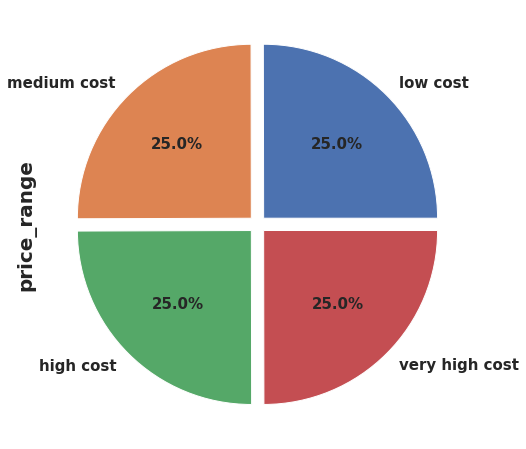

In [20]:
# Visualizing the Target variable's class distribution.
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15)    # plotting pie chart


* We can see that our target varibale is equally distributed. 
* Thus we don't have to worry about data imbalance and there is no need of oversampling or undersampling.Which is good for us.

## Correlation of target varaible i.e Dependent variable with the other independent variable.

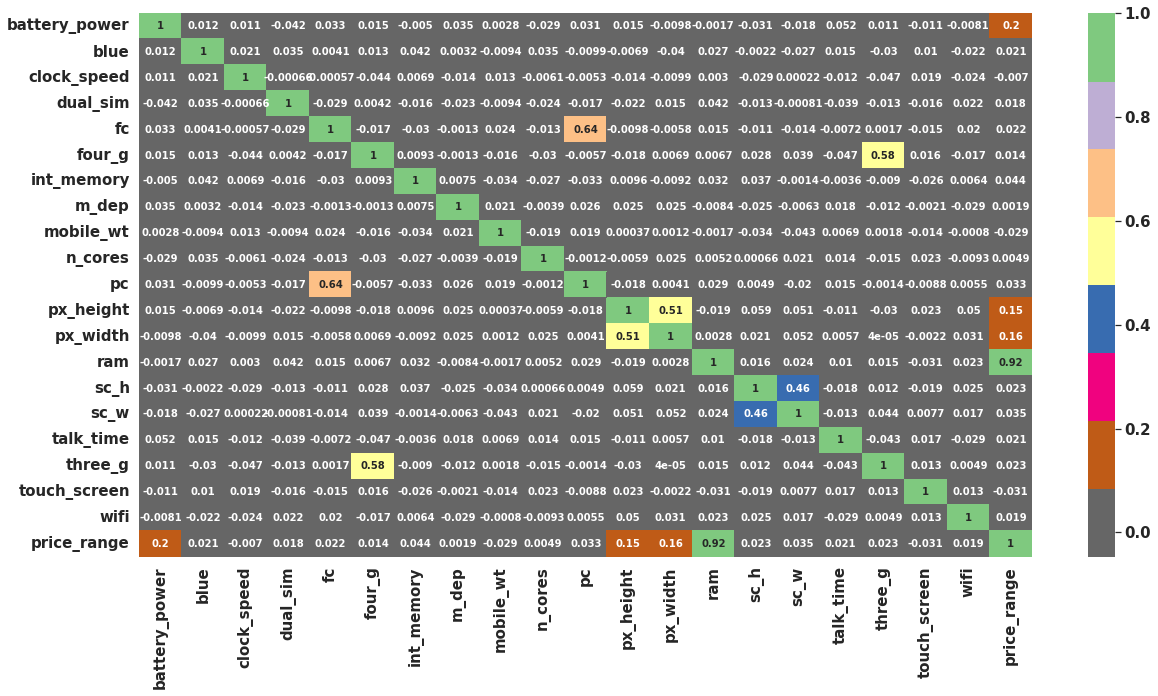

In [21]:
corr= mobile_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

Observations:
* RAM has strong positive correlation with the Price_range. and we know that Mobiles with high RAM are very costly. Thus RAM increases price range also increase.
* Battery_power also has positive correlation with the price range.Generally mobiles having high prices comes with good battery power.
* Also px_height and px_width (Pixel Resolution Height and width) are positively correlated. Generally High price range mobiles have good resolutions.

* Four_g and Three_g are highly positvely correlated. Nowdays most of the smart mobiles has both type of options. This could be the reason that they are correlated.

* primary camera i.e pc and front camera fc are positively correlated.
* sc_h and sc_w are positively correlated. 

In [22]:
mobile_data.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

#Univariate Analysis of Categorical columns.

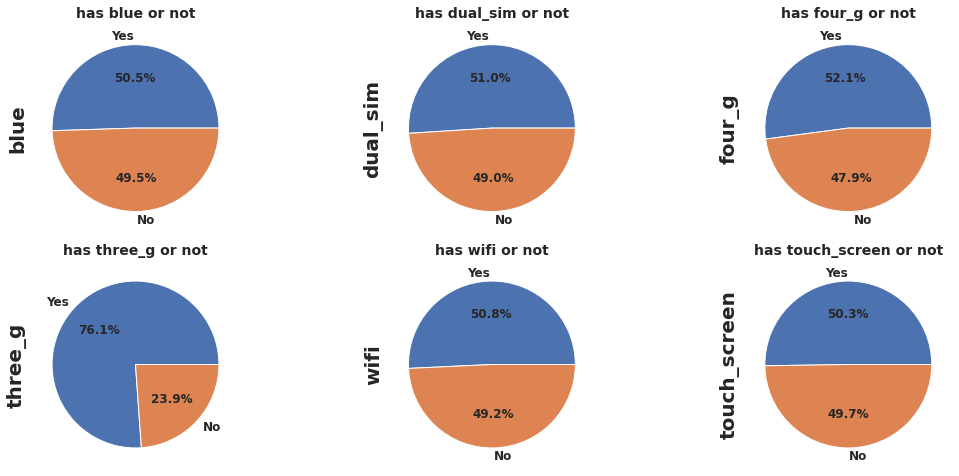

In [23]:
plt.figure(figsize=(15,10))

rows=3
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  mobile_data[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels)
  plt.title(f'has {var} or not',fontsize=14)
  plt.tight_layout()
  count=count+1
  

* 1 means it has the specifications.
* 0 means it do not have the specifications.
* Percentage Distribution of Mobiles having bluetooth,dual sim, 4G,wifi and touchscreem are almost 50 %.
* very few mobiles(23.8%) do not have Three_g.


## Relation Between RAM,Battery_power,px_height and px_width

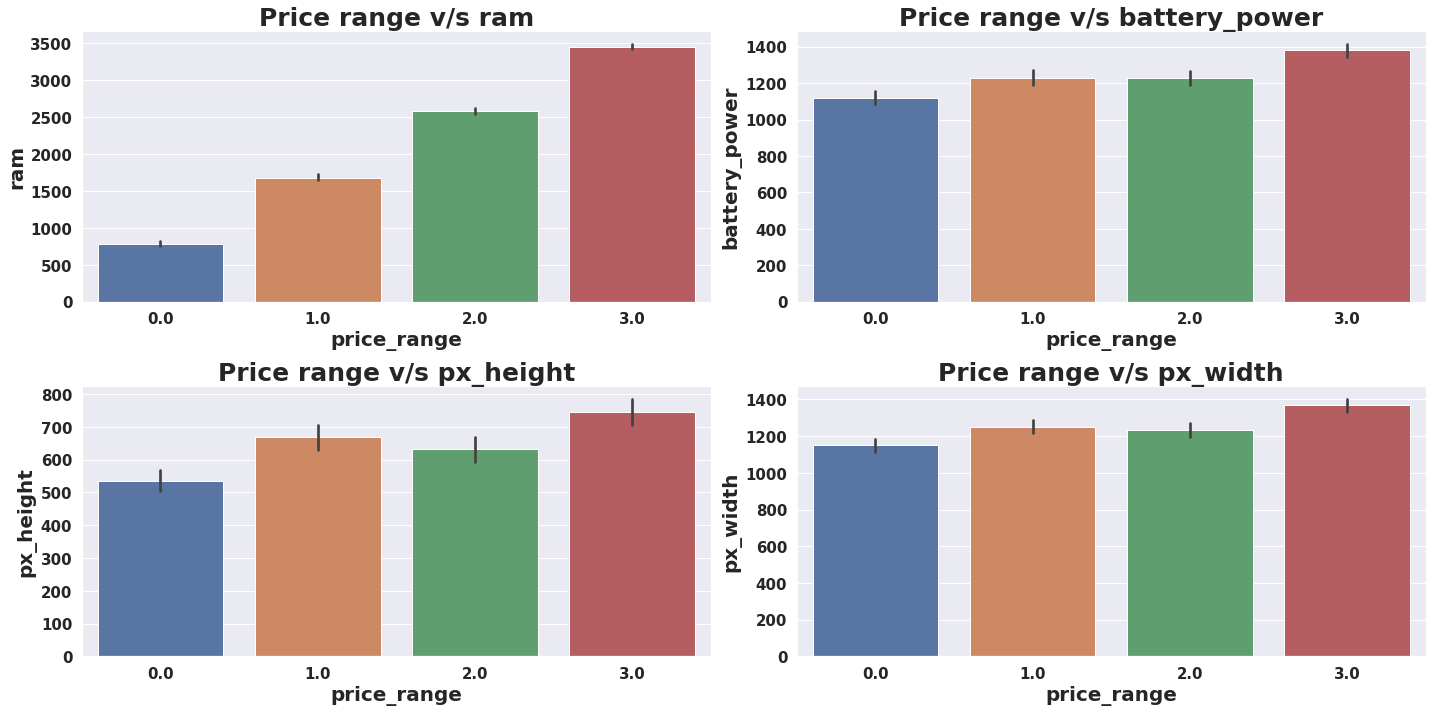

In [24]:
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2
cols=2
counter=1

variables=['ram','battery_power','px_height','px_width']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=mobile_data['price_range'],y=mobile_data[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()




### Observations:
* Mobiles having RAM more than 3000MB falls under Very high cost category.As RAM increases price range also increases.
* Mobiles having RAM less than 1000 MB falls under low cost category.
* Mobiles with battery power more than 1300 mAh has very high cost. And Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category.
* Mobiles with more than 700 pixel height and width more than 1300 has very high cost. 

# Mobiles with both 3G and 4G.

In [25]:
# Mobiles have both 3G and 4G specifications.
three_g_and_4g_df=mobile_data[(mobile_data['three_g']==1) & (mobile_data['four_g']==1)]

In [26]:
three_g_and_4g_df['price_range'].value_counts()

3.0    274
1.0    261
0.0    259
2.0    247
Name: price_range, dtype: int64

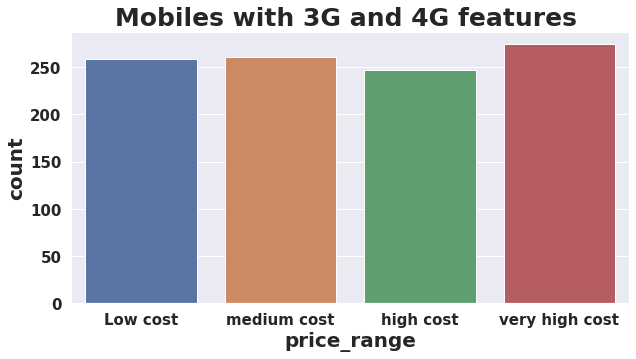

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(three_g_and_4g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with 3G and 4G features ")
plt.show()

* As we can see from low cost to very high cost mobiles have both features.

#mobiles with 3G

In [28]:
three_g_df=mobile_data[(mobile_data['three_g']==1) & (mobile_data['four_g']!=1)]

In [29]:
three_g_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
5,1859.0,0.0,0.5,1.0,3.0,0.0,22.0,0.7,164.0,1.0,7.0,1004.0,1654.0,1067.0,17.0,1.0,10.0,1.0,0.0,0.0,1.0
7,1954.0,0.0,0.5,1.0,0.0,0.0,24.0,0.8,187.0,4.0,0.0,512.0,1149.0,700.0,16.0,3.0,5.0,1.0,1.0,1.0,0.0
8,1445.0,1.0,0.5,0.0,0.0,0.0,53.0,0.7,174.0,7.0,14.0,386.0,836.0,1099.0,17.0,1.0,20.0,1.0,0.0,0.0,0.0
12,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,1482.0,18.0,3.0,2.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,1829.0,1.0,2.1,0.0,8.0,0.0,59.0,0.1,91.0,5.0,15.0,1457.0,1919.0,3142.0,16.0,6.0,5.0,1.0,1.0,1.0,3.0
1990,674.0,1.0,2.9,1.0,1.0,0.0,21.0,0.2,198.0,3.0,4.0,576.0,1809.0,1180.0,6.0,3.0,4.0,1.0,1.0,1.0,0.0
1991,1467.0,1.0,0.5,0.0,0.0,0.0,18.0,0.6,122.0,5.0,0.0,888.0,1099.0,3962.0,15.0,11.0,5.0,1.0,1.0,1.0,3.0
1992,858.0,0.0,2.2,0.0,1.0,0.0,50.0,0.1,84.0,1.0,2.0,528.0,1416.0,3978.0,17.0,16.0,3.0,1.0,1.0,0.0,3.0


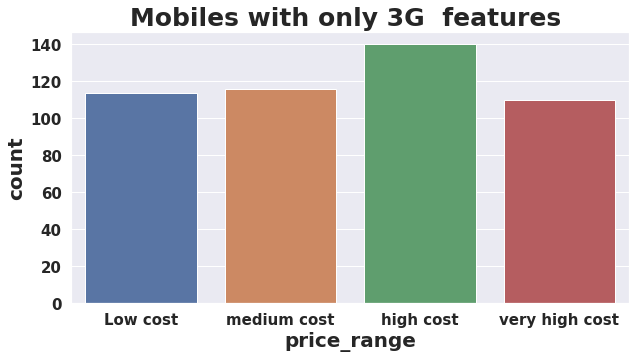

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(three_g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with only 3G  features ")
plt.show()

Observations:
* Mobiles which has very high cost are very less likely to have 3G.
* There are more chances that high cost mobile will have 3G in it.

#Mobiles not having no 3G and 4G. 

In [31]:
No_3g_4G_df=mobile_data[(mobile_data['three_g']!=1) & (mobile_data['four_g']!=1)]

In [32]:
No_3g_4G_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
10,769.0,1.0,2.9,1.0,0.0,0.0,9.0,0.1,182.0,5.0,1.0,248.0,874.0,3946.0,5.0,2.0,7.0,0.0,0.0,0.0,3.0
19,682.0,1.0,0.5,0.0,4.0,0.0,19.0,1.0,121.0,4.0,11.0,902.0,1064.0,2337.0,11.0,1.0,18.0,0.0,1.0,1.0,1.0
22,1949.0,0.0,2.6,1.0,4.0,0.0,47.0,0.3,199.0,4.0,7.0,407.0,822.0,1433.0,11.0,5.0,20.0,0.0,0.0,1.0,1.0
30,1579.0,1.0,0.5,1.0,0.0,0.0,5.0,0.2,88.0,7.0,9.0,1358.0,1739.0,3532.0,17.0,11.0,12.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,1454.0,0.0,2.6,0.0,8.0,0.0,6.0,0.4,199.0,3.0,20.0,698.0,1018.0,1300.0,10.0,9.0,2.0,0.0,0.0,1.0,1.0
1980,1784.0,0.0,1.6,0.0,4.0,0.0,41.0,0.4,164.0,6.0,20.0,610.0,1437.0,2313.0,14.0,1.0,11.0,0.0,1.0,0.0,2.0
1981,1262.0,0.0,1.8,1.0,12.0,0.0,34.0,0.1,149.0,5.0,16.0,223.0,737.0,3248.0,13.0,3.0,4.0,0.0,1.0,1.0,2.0
1986,1547.0,1.0,2.9,0.0,2.0,0.0,57.0,0.4,114.0,1.0,3.0,347.0,957.0,1620.0,9.0,2.0,19.0,0.0,1.0,1.0,1.0


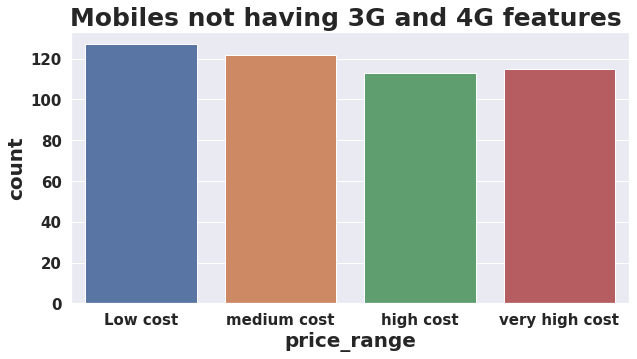

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(No_3g_4G_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles not having 3G and 4G features ")
plt.show()

* Its very obvious that low cost mobiles will not have 3G and 4G.
* Mobiles with very high cost may have 5G. As we know technologies are changes everytime.

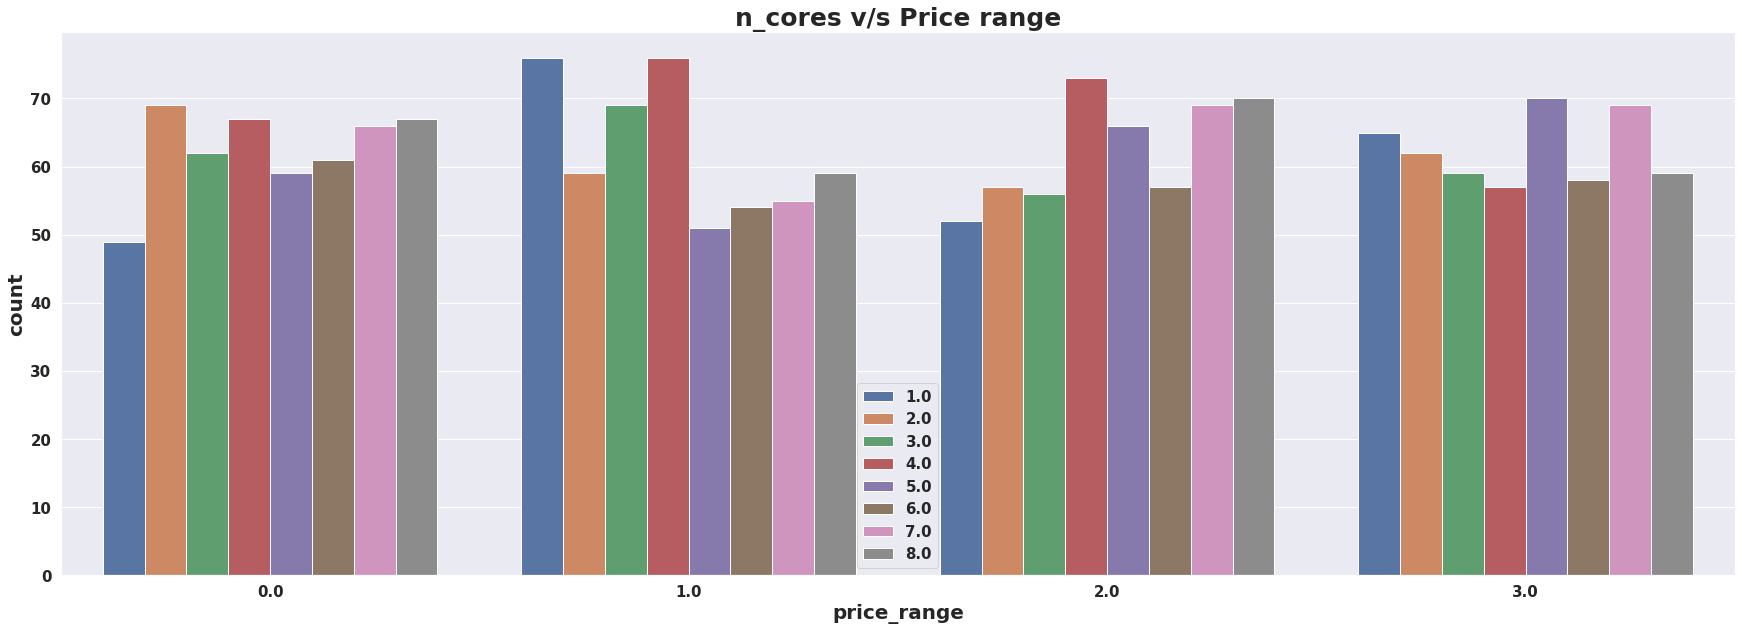

In [34]:
# n_cores v/s price range
plt.figure(figsize=(30,10))
sns.countplot(mobile_data['price_range'],hue=mobile_data['n_cores'])
plt.title("n_cores v/s Price range")
plt.legend(loc='best')


Observations:
* Price range 0 has majority of phones with 2 core processors
* Price range 1 has majority of phones with 1 and 4 core processors
* Price range 2 has majority of phones with 4 core processors
* Price range 3 has majority of phones with 5 and 7 core processors

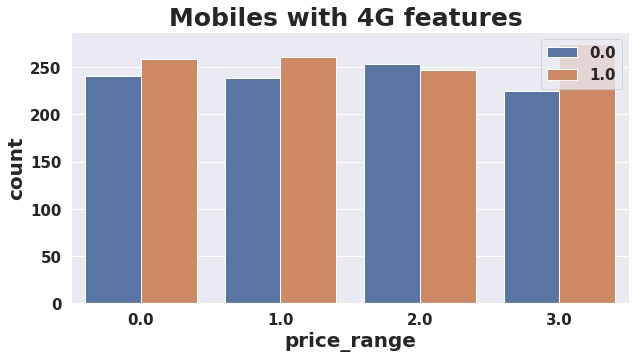

In [35]:

plt.figure(figsize=(10, 5))
sns.countplot(mobile_data['price_range'],hue=mobile_data['four_g'])
plt.title("Mobiles with 4G features ")
plt.legend(loc='best')

Majority of phones of only price range 2 dont have 4G service.

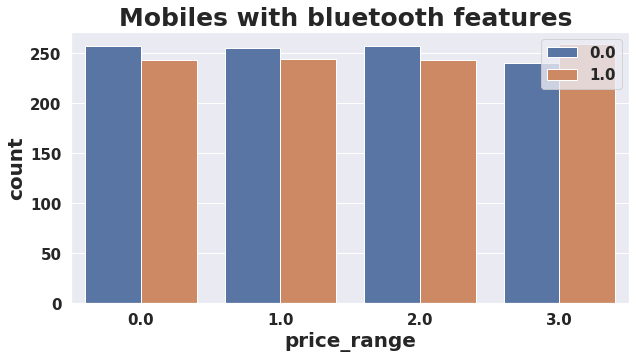

In [36]:
plt.figure(figsize=(10, 5))
sns.countplot(mobile_data['price_range'],hue=mobile_data['blue'])
plt.title("Mobiles with bluetooth features ")
plt.legend(loc='best')


Majority of phones of price range from 0 to 2 dont have bluetooth on other hand price range of 3 have bluetooth service.

In [37]:
mobile_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Let's Check the distribution of numerical columns and Outliers.

In [38]:
mobile_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [39]:
numeric_col=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',]

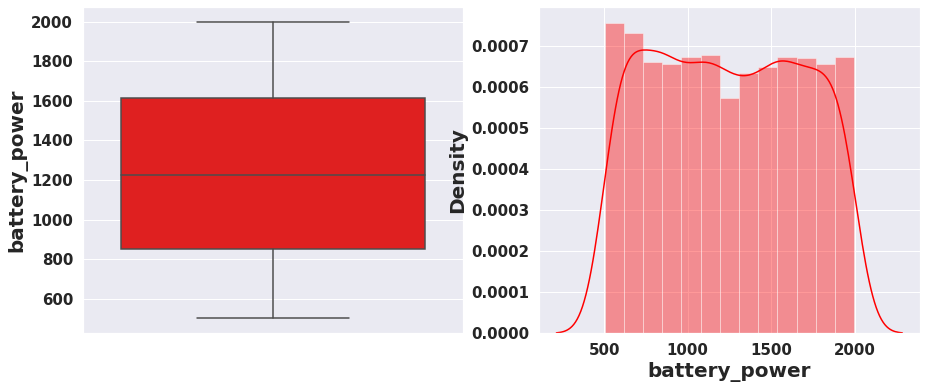

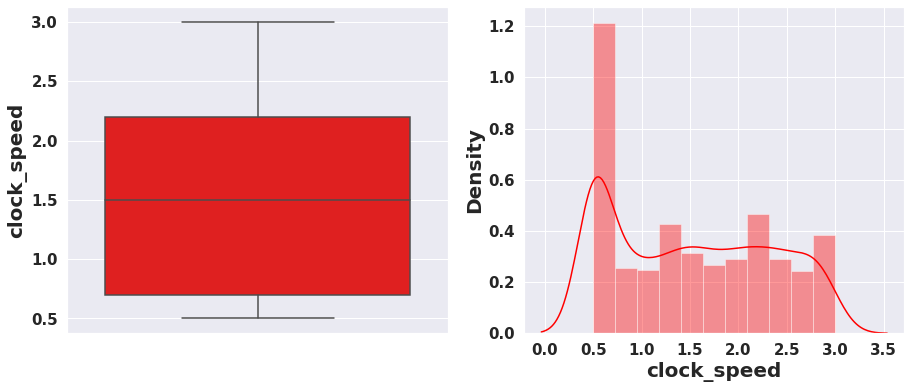

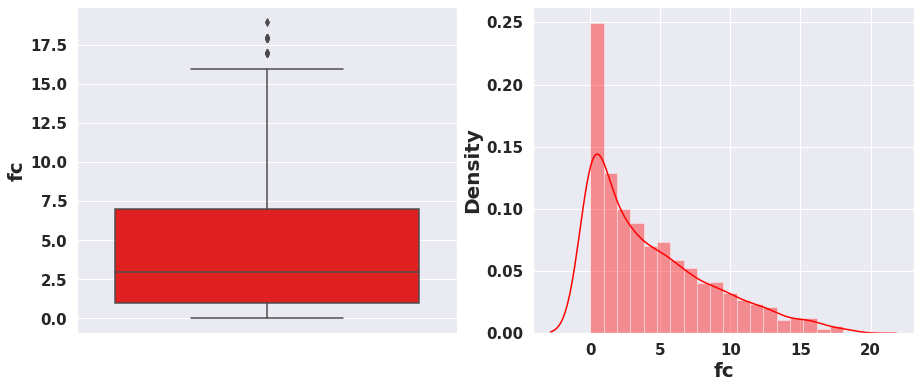

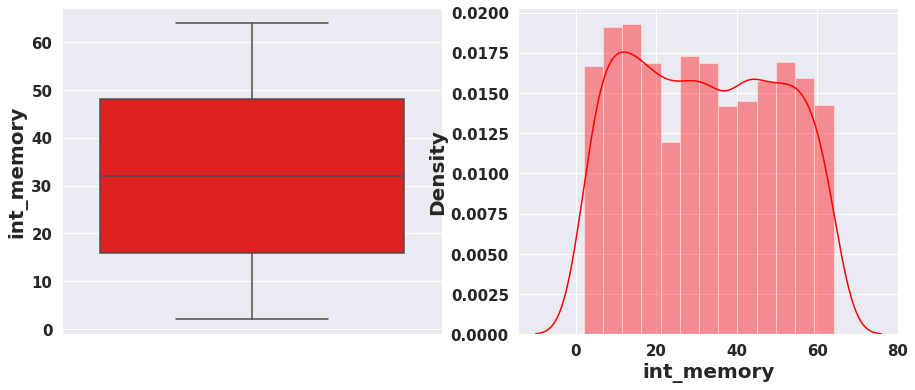

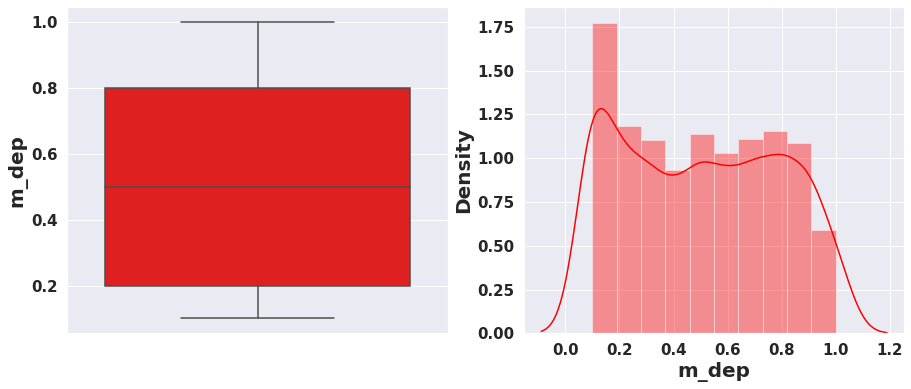

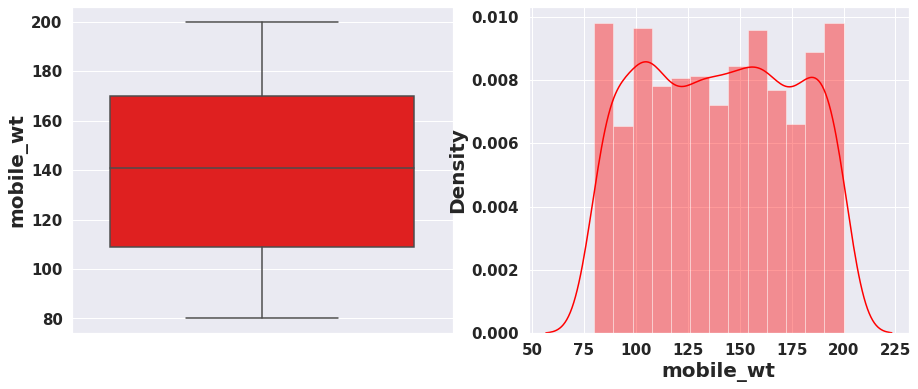

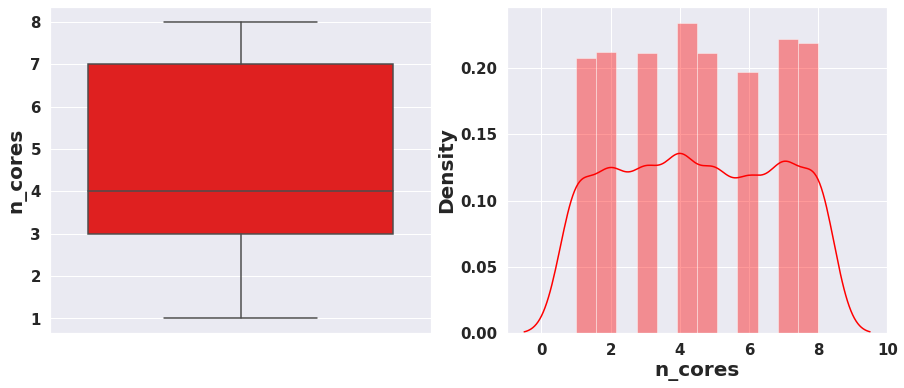

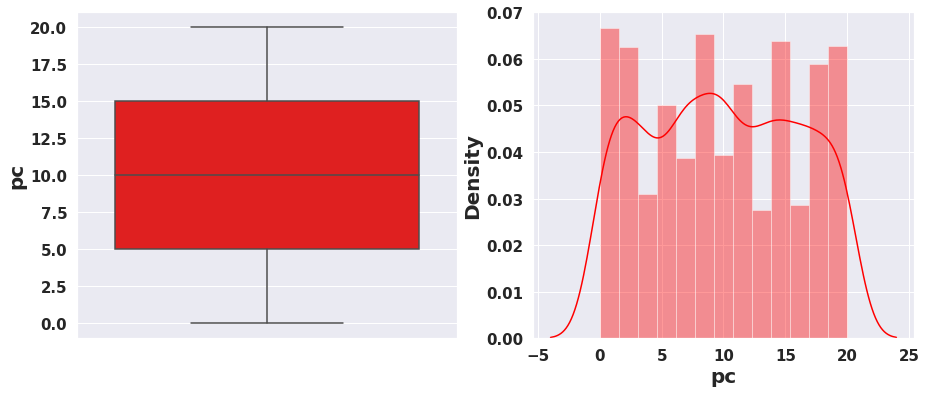

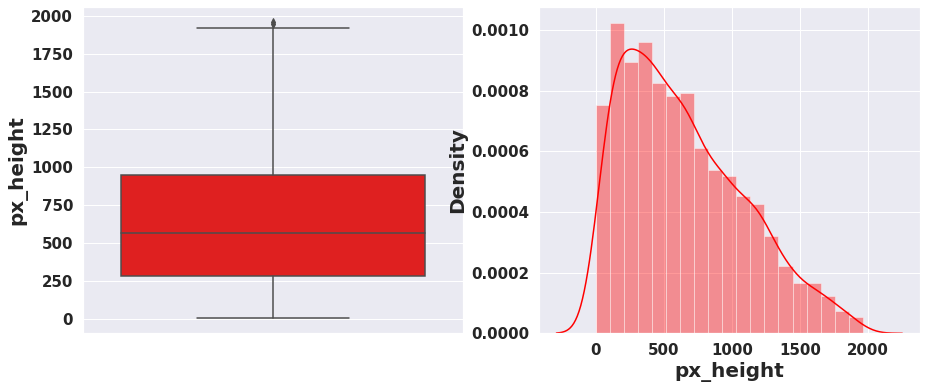

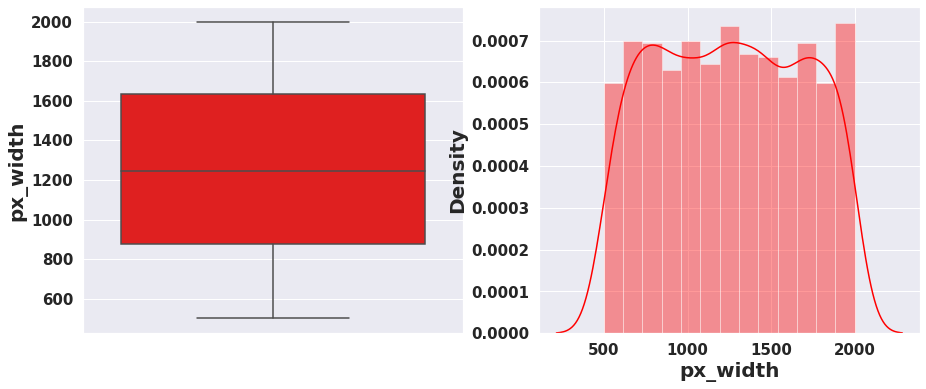

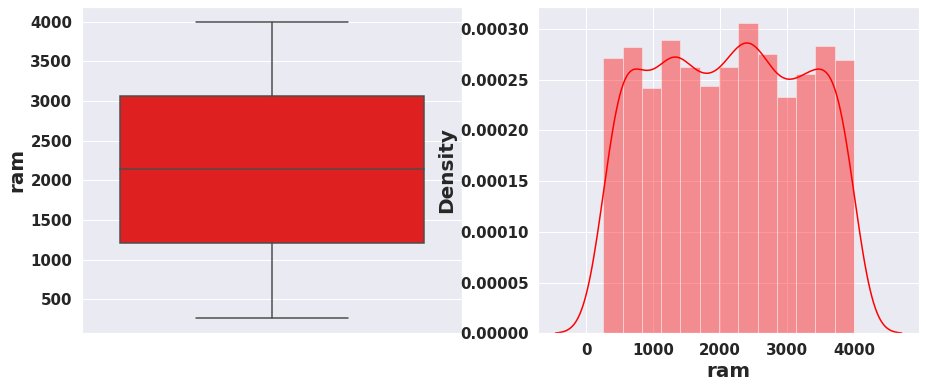

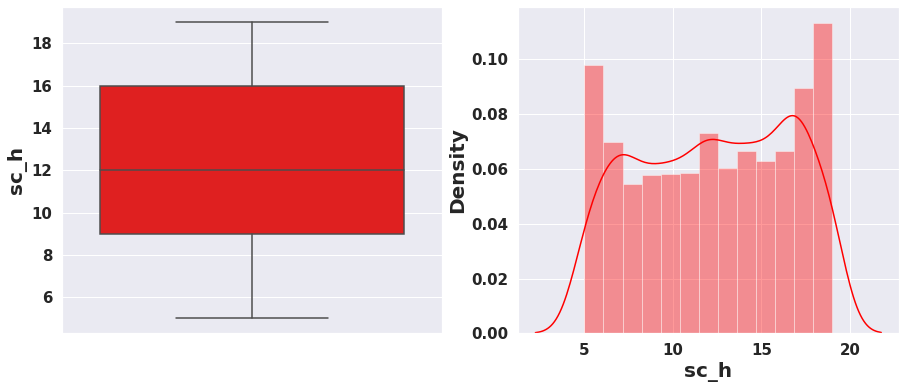

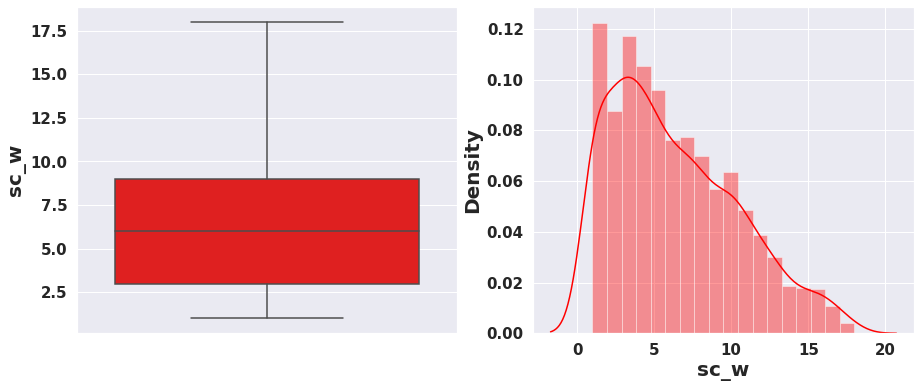

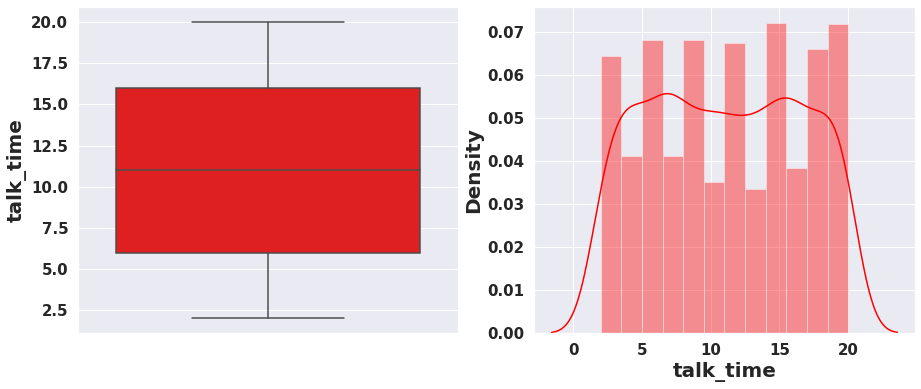

In [40]:
for var in numeric_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=mobile_data[var],color='red')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(mobile_data[var],color='red')
    
    fig.set_xlabel(var)

    plt.show()

* Data is well distrubted.
* fc and px_height has some outliers.

# Outlier Treatment.

In [41]:
Q1 = mobile_data["fc"].quantile(0.25)
Q3 = mobile_data['fc'].quantile(0.991)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.
mobile_data = mobile_data[(mobile_data['fc'] <= Q3)]

In [42]:

Q1 = mobile_data["px_height"].quantile(0.25)
Q3 = mobile_data['px_height'].quantile(0.991)
IQR = Q3-Q1
# Outliers are present after Quartile 3. so we will take datapoints before Q3.
mobile_data = mobile_data[(mobile_data['px_height'] <= Q3)]

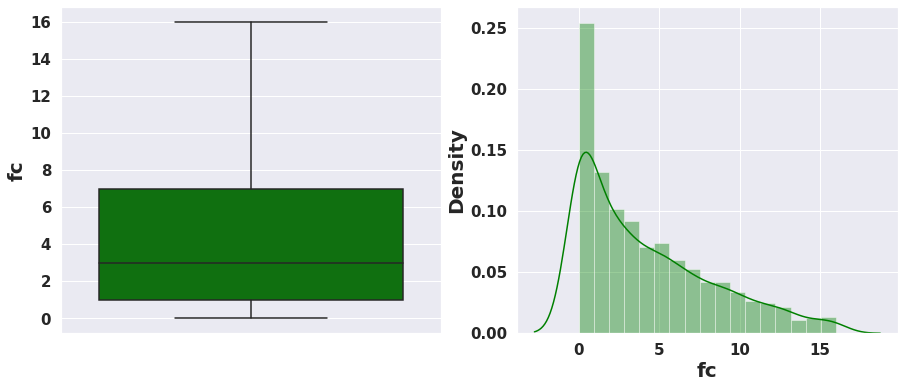

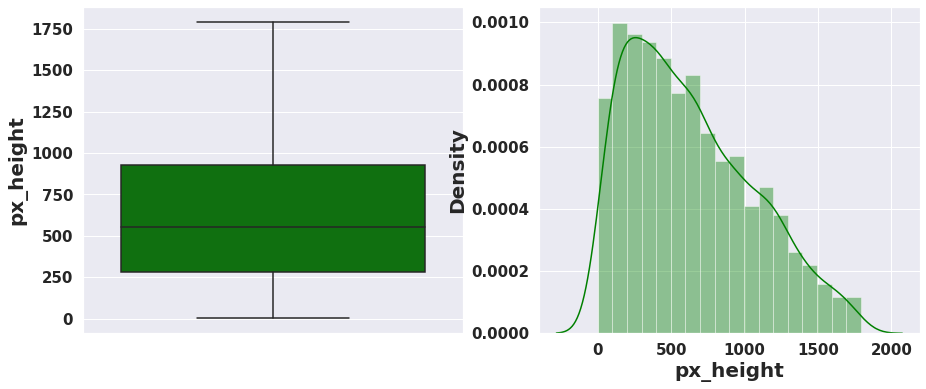

In [43]:
for var in ['fc','px_height']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=mobile_data[var],color='green')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(mobile_data[var],color='green')
    
    fig.set_xlabel(var)

    plt.show()

In [44]:
mobile_data.shape

(1962, 21)

#SO we have handled Outliers.

In [45]:
# create copy of mobile_data
mobile_data_df=mobile_data.copy()

# Feature Selection

In [46]:
# checking newly created column.
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0


In [47]:
# # create new colom screen size.
# mobile_data['screen_size']= round(np.sqrt(mobile_data['sc_h']**2+mobile_data['sc_w']**2)/2.54,2)

In [48]:
# mobile_data['Pixels']=mobile_data['px_height']*mobile_data['px_width']

In [49]:
# mobile_data.drop(columns=["sc_h",'sc_w','px_height','px_width'],axis=1,inplace=True)

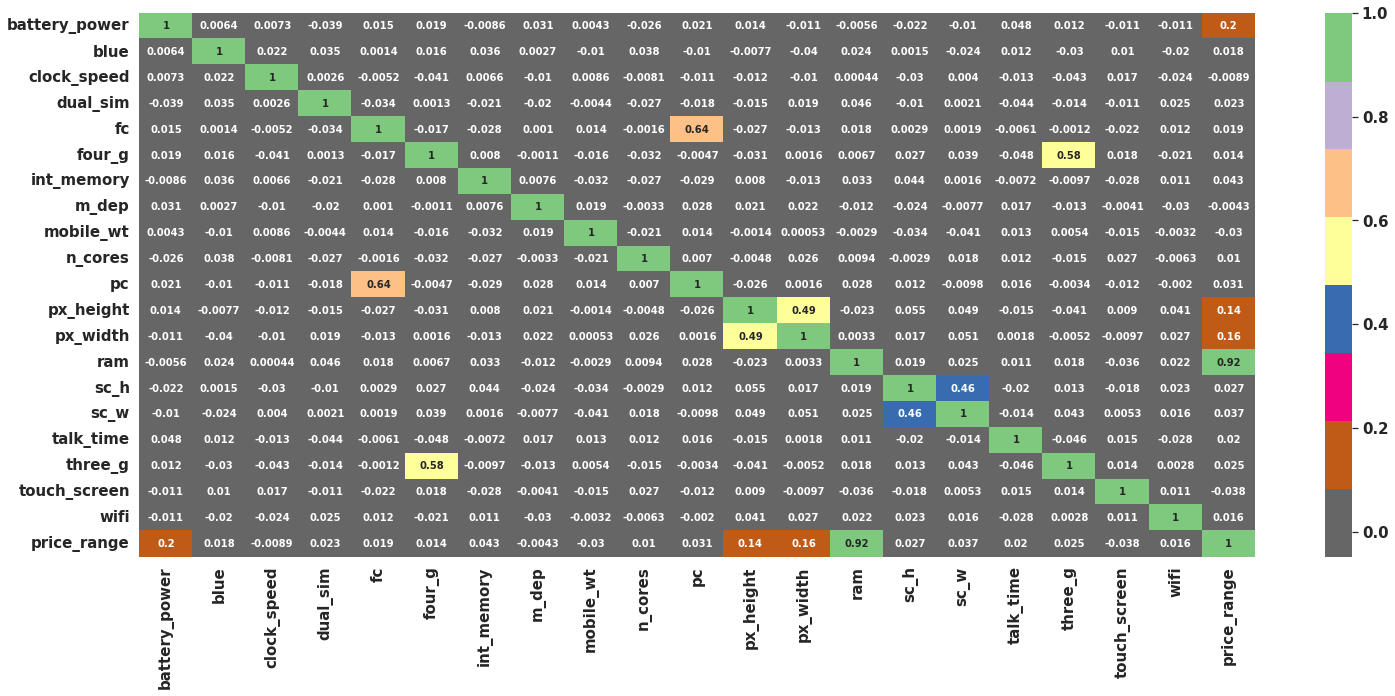

In [50]:
corr= mobile_data.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

In [51]:
# mobile_data.drop(columns=["sc_h",'four_g','px_width'],axis=1,inplace=True)

### Mutual Information
* MI Estimate mutual information for a discrete target variable.

* Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

* The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

* Inshort

* A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

* The mutual information between two random variables X and Y can be stated formally as follows:

* I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [52]:
# Separating X variables(indpendent variables) and Y(dependent variable) variable.
X=mobile_data.drop('price_range',axis=1)
y=mobile_data["price_range"]

In [53]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X, y)
mutual_info

array([2.63046586e-02, 0.00000000e+00, 0.00000000e+00, 6.92288083e-04,
       0.00000000e+00, 3.23123839e-03, 8.36311672e-03, 1.00518048e-02,
       1.72430427e-02, 4.70348859e-03, 3.58585172e-03, 3.04496874e-02,
       2.74047247e-02, 8.52642472e-01, 0.00000000e+00, 5.66202674e-03,
       0.00000000e+00, 1.67899935e-03, 0.00000000e+00, 0.00000000e+00])

In [54]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

ram              0.852642
px_height        0.030450
px_width         0.027405
battery_power    0.026305
mobile_wt        0.017243
m_dep            0.010052
int_memory       0.008363
sc_w             0.005662
n_cores          0.004703
pc               0.003586
four_g           0.003231
three_g          0.001679
dual_sim         0.000692
blue             0.000000
fc               0.000000
sc_h             0.000000
clock_speed      0.000000
talk_time        0.000000
touch_screen     0.000000
wifi             0.000000
dtype: float64

Text(0.5, 1.0, 'mutual_info values per feature')

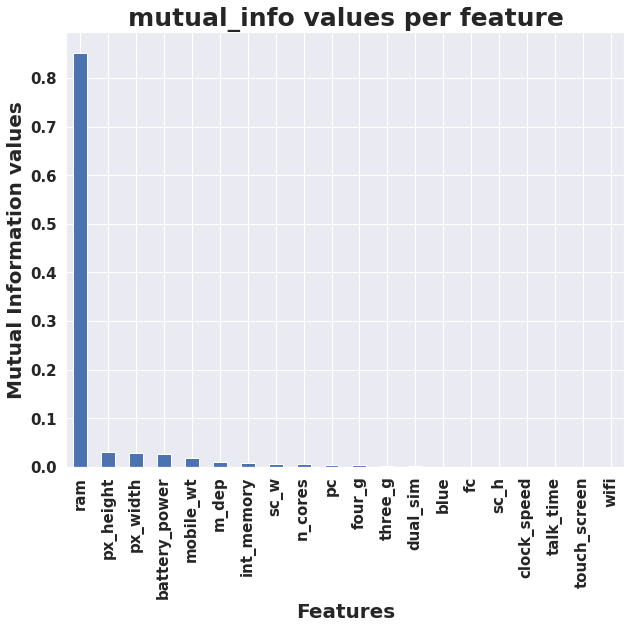

In [55]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10 ,8))
plt.ylabel('Mutual Information values')
plt.xlabel('Features')
plt.title('mutual_info values per feature')

* We can see RAM has the high information value with respect to target variable.That means 'Price range' has high depedency on 'RAM'.
* px_width,battery_power,px_height,three_g,touch_screen has alomost equal information values with respect to target varaible.
* So here will select top 10 features.



In [56]:
from sklearn.feature_selection import SelectKBest

In [57]:
#No we Will select the  top 13 important features
sel_ten_cols = SelectKBest(mutual_info_classif, k=13)
sel_ten_cols.fit(X, y)
X.columns[sel_ten_cols.get_support()]

Index(['battery_power', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'mobile_wt',
       'n_cores', 'px_height', 'px_width', 'ram', 'sc_w', 'three_g', 'wifi'],
      dtype='object')

In [58]:
X=mobile_data[['battery_power', 'fc', 'four_g', 'm_dep', 'mobile_wt', 'px_height',
       'px_width', 'ram', 'sc_w', 'talk_time', 'three_g', 'touch_screen',
       'wifi']]
y=mobile_data['price_range']



# Predictive Modeling:
Algorithms used for predictive modeling:
* 1) Logistic regression
* 2) Decision Tree
* 3) Random Forest classifier
* 4) Gradient Boosting Classifier
* 5) Ada Boost Classifier.
* 6) K-nearest Neighbour classifier
* 7) XG Boost Classifier


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix



In [60]:
# splitting the data into Train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1373, 13)
(589, 13)
(1373,)
(589,)


In [61]:

# Scaling the data.
# creating an object of MinMax Scaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)   # fitting the X_train
X_test_scaled=scaler.transform(X_test)         # transforming X_test

In [62]:
# roc curve for classes
def plot_Auc_roc(y_test,pred_prob):

  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 4

  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
      
  # plotting    
  plt.figure(figsize=(12,8))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= ((f'Class 0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=((f'Class 1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=((f'Class 2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=((f'Class 3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC',dpi=300);  

# 1) **Logistic Regression**

* ***Accuracy is a good metric to use when the classes are balanced.***
* ***As our dependent variable has balanced distribution of all 4  categories.
So we will be using accuracy score as our main evalution metrics along with that we will check recall for individual categories.***

### **With default hyperparamters**

In [63]:
# creating object of logistic regression
log_reg= LogisticRegression(random_state=0)
log_reg.fit(X_train_scaled,y_train)

LogisticRegression(random_state=0)

In [64]:
# Predicting y values of train and test data
y_pred_train=log_reg.predict(X_train_scaled)
y_pred=log_reg.predict(X_test_scaled)

In [65]:
# Checking Train accuracy score
accuracy_score(y_train,y_pred_train)

0.9351784413692644

In [66]:
# Checking Test Accuarcy Score.
accuracy_score(y_test,y_pred)

0.9185059422750425

In [67]:
cf_matrix=confusion_matrix(y_test,y_pred)

In [68]:
Class_cat = ['low cost','medium cost', 'high cost', 'very high cost']

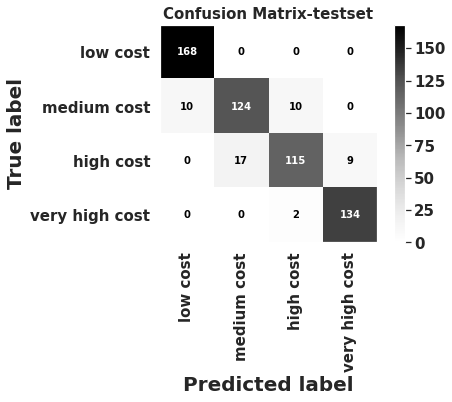

In [69]:
#Visualising the confusion matrix to evaluate the performance of the model
plot_confusion_matrix(log_reg, X_test_scaled, y_test,cmap='Greys',display_labels=Class_cat, xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [70]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       326
         1.0       0.91      0.91      0.91       347
         2.0       0.93      0.88      0.90       350
         3.0       0.94      0.98      0.96       350

    accuracy                           0.94      1373
   macro avg       0.94      0.94      0.94      1373
weighted avg       0.93      0.94      0.93      1373



In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       168
         1.0       0.88      0.86      0.87       144
         2.0       0.91      0.82      0.86       141
         3.0       0.94      0.99      0.96       136

    accuracy                           0.92       589
   macro avg       0.92      0.92      0.92       589
weighted avg       0.92      0.92      0.92       589



* **Train accuracy is 94 % and test accuarcy is 92%.**
* **Recall for individual class is also good..**

### **Let's do some hyperparamter tuning with GridSearchCV.**

In [72]:
# Creating an object for classifier
lgr=LogisticRegression(random_state=0)

In [73]:
# Applying GridsearchCV para_grid values and hyperparamter selection is based on accuracy score.
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5]}

In [74]:
grid_clf_acc = GridSearchCV(lgr, param_grid = grid_values,scoring = 'accuracy',cv=5)

grid_clf_acc.fit(X_train_scaled, y_train)   # fitting gridsearchCv

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [75]:
# getting best parametrs.
grid_clf_acc.best_params_

{'C': 5, 'penalty': 'l2'}

In [76]:
# fitting logistic model with best parameters.
lgr_optimal=LogisticRegression(C=5,penalty='l2',random_state=0)
lgr_optimal.fit(X_train_scaled,y_train)

LogisticRegression(C=5, random_state=0)

In [77]:
# Predicting y values of train and test set
y_train_pred=lgr_optimal.predict(X_train_scaled)
y_pred=lgr_optimal.predict(X_test_scaled)

In [78]:
# Checking accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

0.9664967225054625

In [79]:
# Checking accuarcy score of train set.
accuracy_score(y_test,y_pred)

0.9609507640067911

In [80]:
# Creating confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[168,   0,   0,   0],
       [  5, 136,   3,   0],
       [  0,   9, 128,   4],
       [  0,   0,   2, 134]])

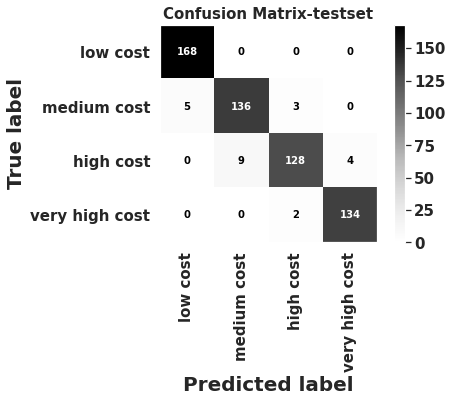

In [81]:
#Visualising the confusion matrix to evaluate the performance of the model
plot_confusion_matrix(lgr_optimal, X_test_scaled, y_test,cmap='Greys',display_labels=Class_cat, xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [82]:

# Printing classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       326
         1.0       0.96      0.96      0.96       347
         2.0       0.96      0.95      0.95       350
         3.0       0.97      0.98      0.98       350

    accuracy                           0.97      1373
   macro avg       0.97      0.97      0.97      1373
weighted avg       0.97      0.97      0.97      1373



In [83]:
# Printing classification report for test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       168
         1.0       0.94      0.94      0.94       144
         2.0       0.96      0.91      0.93       141
         3.0       0.97      0.99      0.98       136

    accuracy                           0.96       589
   macro avg       0.96      0.96      0.96       589
weighted avg       0.96      0.96      0.96       589



In [84]:
imp = np.abs(lgr_optimal.coef_[0])+ np.abs(lgr_optimal.coef_[1])+ np.abs(lgr_optimal.coef_[2])+ np.abs(lgr_optimal.coef_[3])

In [85]:
feat_imp = pd.Series(imp, X_train.columns).sort_values(ascending=True)
feat_imp

wifi              0.271278
three_g           0.453190
m_dep             0.472096
four_g            0.484143
talk_time         0.491629
touch_screen      0.523163
fc                0.625841
sc_w              0.709750
mobile_wt         2.025832
px_width          9.672761
px_height        10.786031
battery_power    16.799026
ram              67.681821
dtype: float64

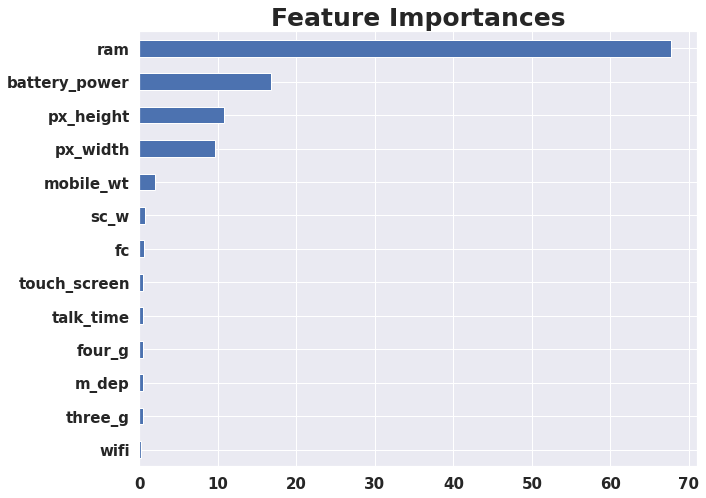

In [86]:
plt.figure(figsize=(10,8))
feat_imp.plot(kind='barh', title='Feature Importances')

RAM,battery,px_height and px_weight are the most important features which influnce the price most.

#AUR-ROC curve

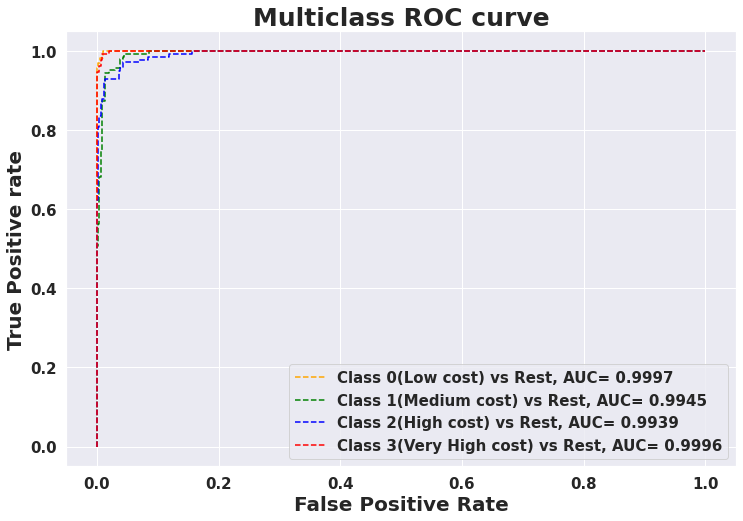

In [87]:
# Plot AUC ROC curve.
pred_prob = grid_clf_acc.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

We have got good AUC ROC curve. Area under curve for each class vs rest is almost 1 which indicates that our model performed very well.

* **We have improved the model performance after tunning the hyperparamters. Best Paramters are c=5 and penalty='l2'.**
* **Model perfromance has increased from 90% to 94 % on test data.**
* **RAM,battery_power,px_height and px_weight are the most important faeatures which influnce the price range.**

# **Decision Tree Classifier:**

**Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.**
**So here we will use X_train,X_test,y_test and Y_train whcih are not scaled.**

***Decision Tree with default hyperparameters:***

In [88]:
# Creating object of the decision tree.
dtc=DecisionTreeClassifier(random_state=0)


In [89]:
# fitting/training the train set.
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [90]:
# Predicting y values of train and test data.
y_train_pred=dtc.predict(X_train)
y_pred=dtc.predict(X_test)

In [91]:
# Checking train set accuracy.
accuracy_score(y_train,y_train_pred)

1.0

In [92]:
# Checking test set accuracy
accuracy_score(y_test,y_pred)

0.8353140916808149

In [93]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[152,  16,   0,   0],
       [ 15, 109,  20,   0],
       [  0,  13, 118,  10],
       [  0,   0,  23, 113]])

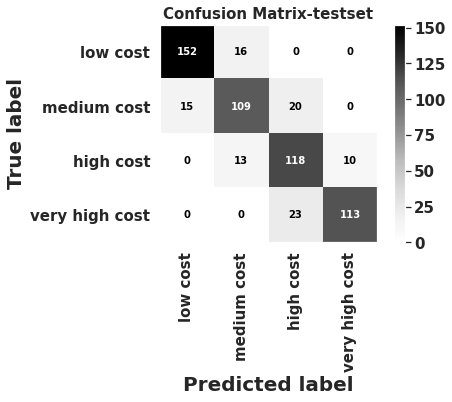

In [94]:
# plotting confusion matrix for test set.
plot_confusion_matrix(dtc,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [95]:
# Printing classification of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       326
         1.0       1.00      1.00      1.00       347
         2.0       1.00      1.00      1.00       350
         3.0       1.00      1.00      1.00       350

    accuracy                           1.00      1373
   macro avg       1.00      1.00      1.00      1373
weighted avg       1.00      1.00      1.00      1373



In [96]:
# printing classification of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.91       168
         1.0       0.79      0.76      0.77       144
         2.0       0.73      0.84      0.78       141
         3.0       0.92      0.83      0.87       136

    accuracy                           0.84       589
   macro avg       0.84      0.83      0.83       589
weighted avg       0.84      0.84      0.84       589



* ***Train set accuracy is 100% and test accuracy is 84%.***
* ***Model is overfitted on train set and did not generalised well.***
* ***We will tune hyperparamters to reduce overfitting and try to imporve the model performance.***

### **Let's tune some hypereparameters of Decsion Tree classifier:**

In [97]:
# creating an object of classifier.
dtc_= DecisionTreeClassifier(random_state=0)

In [98]:
# paramter grid values for hyperparameter tunning.
grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,7,8,9,10],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['auto','sqrt','log2',None]}

In [99]:
# applying GridSearchCv and fitting the model with it.
dtc_tune=GridSearchCV(dtc_,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)
dtc_tune.fit(X_train_scaled,y_train)   # model fitting.

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.262 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.284 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.305 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.259 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.299 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.422 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.462 total time=   0.0s
[CV 3/5] END criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [100]:
# getting best parameters for model.
dtc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': None,
 'min_samples_split': 10,
 'splitter': 'best'}

In [101]:
dtc_tune.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=10,
                       random_state=0)

In [102]:
# using best parameters and training the the data.
dtc_optimal=DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=10,random_state=0)
dtc_optimal.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=10,
                       random_state=0)

In [103]:
# predicting y values of train and test set.
y_train_pred=dtc_optimal.predict(X_train)
y_pred=dtc_optimal.predict(X_test)

In [104]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

0.953386744355426

In [105]:
# Checking the accuarcy score of test set.
accuracy_score(y_test,y_pred)

0.8353140916808149

In [106]:
# getting confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[161,   7,   0,   0],
       [ 24, 102,  18,   0],
       [  0,  19, 111,  11],
       [  0,   0,  18, 118]])

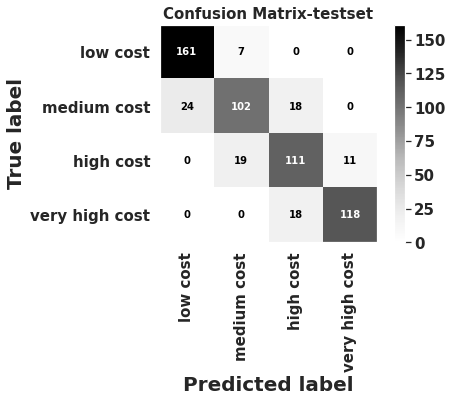

In [107]:
# plotting confusion matrix for test set.
plot_confusion_matrix(dtc_optimal,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [108]:
# printing classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       326
         1.0       0.95      0.93      0.94       347
         2.0       0.94      0.93      0.94       350
         3.0       0.97      0.97      0.97       350

    accuracy                           0.95      1373
   macro avg       0.95      0.95      0.95      1373
weighted avg       0.95      0.95      0.95      1373



In [109]:
# printing classification report for test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       168
         1.0       0.80      0.71      0.75       144
         2.0       0.76      0.79      0.77       141
         3.0       0.91      0.87      0.89       136

    accuracy                           0.84       589
   macro avg       0.83      0.83      0.83       589
weighted avg       0.84      0.84      0.83       589



In [110]:
# creating a function for plotting the feature importances.
def plot_feature_importance(algo):
  ''' Takes the alogorithm as input and 
  plots the feature importance graph'''
  
  # get importance
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':X.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'])
  plt.title('Feature Importance')

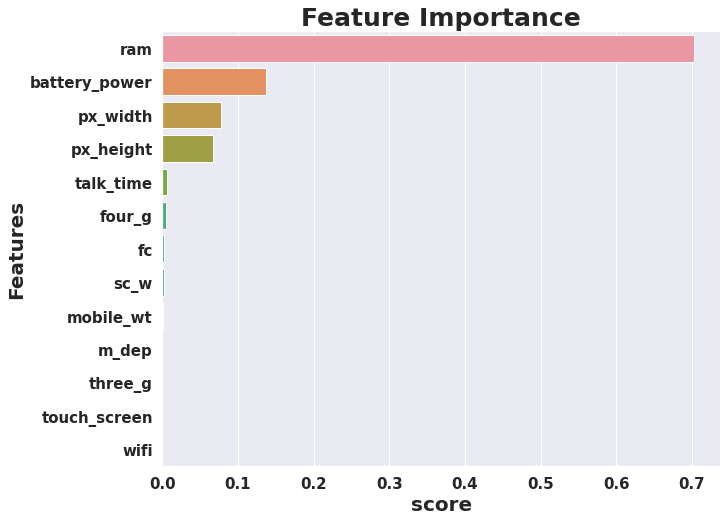

In [111]:
#plotting feature importances
plot_feature_importance(dtc_optimal)

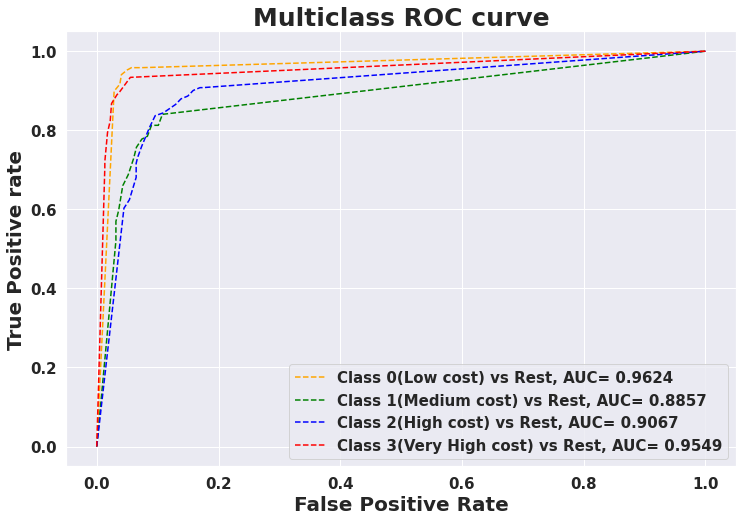

In [112]:
# Plot AUC ROC curve.
pred_prob = dtc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

### **Decision Tree Classifier-Observations:**
* ***Train accuarcy has been reduced to 95% from 100% and test accuarcy remained almost same i.e 84%. Thus we somewhat reduced the overfiiting by reducing the training accuarcy. However this will not be good model for us.***

* ***RAM,battery power,px_height and width came out to be the most important featrures***
* ***This model classified the class 0 and class 3 very nicely as we can see the AUC is almost 0.96 for both classes,whereas for class 1 and class 2 it 0.88 and 0.90 respectively.***

# 3) Random Forest classifier:

### **With default hyperparamters:**

In [113]:
# creating an object of the classifier.
rfc=RandomForestClassifier(random_state=0)

In [114]:
# fitting/training the model.
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [115]:
# predicting the y values of train set and test set.
y_train_pred=rfc.predict(X_train)
y_pred=rfc.predict(X_test)

In [116]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

1.0

In [117]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.8709677419354839

In [118]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[160,   8,   0,   0],
       [ 12, 120,  12,   0],
       [  0,  21, 109,  11],
       [  0,   0,  12, 124]])

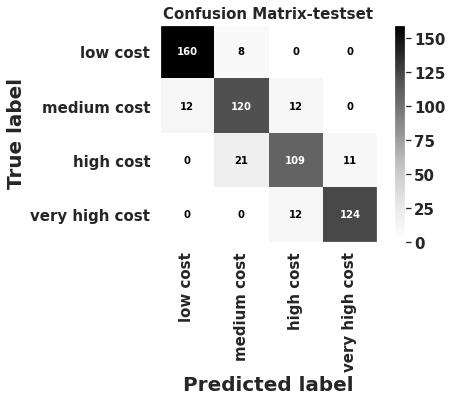

In [119]:
# plotting confusion matrix for test set.
plot_confusion_matrix(rfc,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [120]:
# printing the classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       326
         1.0       1.00      1.00      1.00       347
         2.0       1.00      1.00      1.00       350
         3.0       1.00      1.00      1.00       350

    accuracy                           1.00      1373
   macro avg       1.00      1.00      1.00      1373
weighted avg       1.00      1.00      1.00      1373



In [121]:
# printing the classification report for train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       168
         1.0       0.81      0.83      0.82       144
         2.0       0.82      0.77      0.80       141
         3.0       0.92      0.91      0.92       136

    accuracy                           0.87       589
   macro avg       0.87      0.87      0.87       589
weighted avg       0.87      0.87      0.87       589



* ***Train accuarcy is 100% and test accuracy is 87%. which is quite good. But model seems to be overfitted and has not generalised the data well. We need to reduce overfitting and improve the model performance.***
* ***we do some hyperparameter tunning to reduce overfitting***

### **Let's do some Hyperparamter Tunning of the Random forest model**

In [122]:
# para_grid values to pass in gridsearchcv.
grid_values={'n_estimators' : [200,400,600,800,1000],
    'max_depth' : [3,5,8,10,11],
    'min_samples_leaf' : [5,6,7,8,9],
    'min_samples_split' :[2,4,6,8],
    'max_leaf_nodes':[20, 40],
    'criterion' : ['gini','entropy']
             }

In [123]:
# creating the instance 
rfc_= RandomForestClassifier(random_state=0)

In [124]:
# Applying GridSearchCV
rfc_tune=GridSearchCV(rfc_,param_grid=grid_values,cv=5,verbose=3,scoring='accuracy')
rfc_tune.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
[CV 1/5] END criterion=entropy, max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.796 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.833 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.800 total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.785 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.807 total time=   0.5s
[CV 1/5] END criterion=entropy, max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, n_estimators=400;, score=0.782 total time=   0.9s
[CV 2/5] END criter

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 8, 10, 11],
                         'max_leaf_nodes': [20, 40],
                         'min_samples_leaf': [5, 6, 7, 8, 9],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [200, 400, 600, 800, 1000]},
             scoring='accuracy', verbose=3)

In [125]:
rfc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_leaf_nodes': 40,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [130]:
rfc_optimal=RandomForestClassifier(criterion='entropy',max_depth=11,min_samples_leaf=6,max_leaf_nodes=40,min_samples_split=2,n_estimators=1000,random_state=0)
rfc_optimal.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, max_leaf_nodes=40,
                       min_samples_leaf=6, n_estimators=1000, random_state=0)

In [131]:
y_train_pred=rfc_optimal.predict(X_train)
y_pred=rfc_optimal.predict(X_test)

In [132]:
accuracy_score(y_train,y_train_pred)

0.9577567370721048

In [133]:
accuracy_score(y_test,y_pred)

0.8590831918505942

In [136]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[160,   8,   0,   0],
       [ 13, 115,  16,   0],
       [  0,  25, 103,  13],
       [  0,   0,   8, 128]])

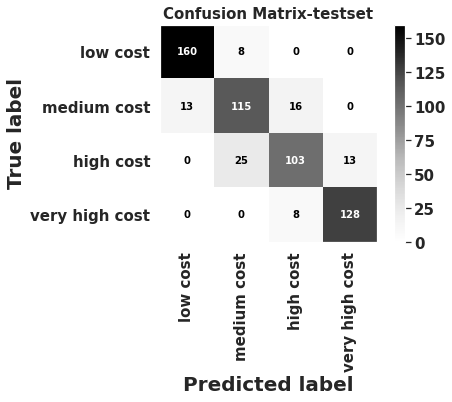

In [137]:
# plotting confusion matrix for test set.
plot_confusion_matrix(rfc_optimal,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [138]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       326
         1.0       0.93      0.94      0.93       347
         2.0       0.94      0.92      0.93       350
         3.0       0.98      0.99      0.98       350

    accuracy                           0.96      1373
   macro avg       0.96      0.96      0.96      1373
weighted avg       0.96      0.96      0.96      1373



In [139]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94       168
         1.0       0.78      0.80      0.79       144
         2.0       0.81      0.73      0.77       141
         3.0       0.91      0.94      0.92       136

    accuracy                           0.86       589
   macro avg       0.86      0.86      0.85       589
weighted avg       0.86      0.86      0.86       589



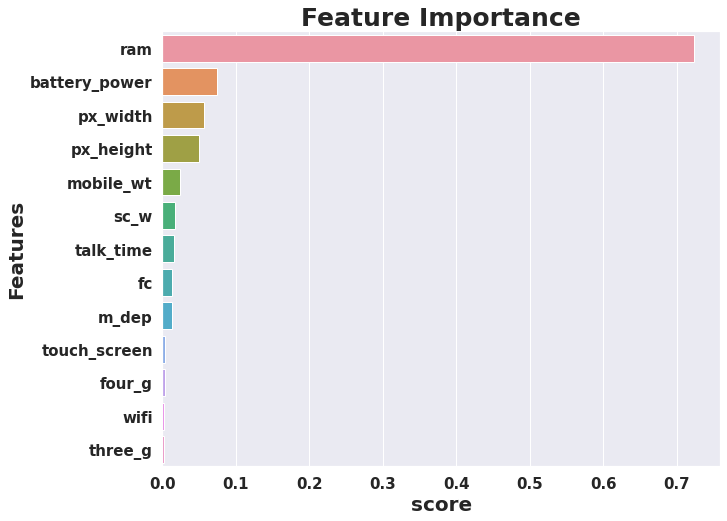

In [140]:
#plotting feature importances
plot_feature_importance(rfc_optimal)

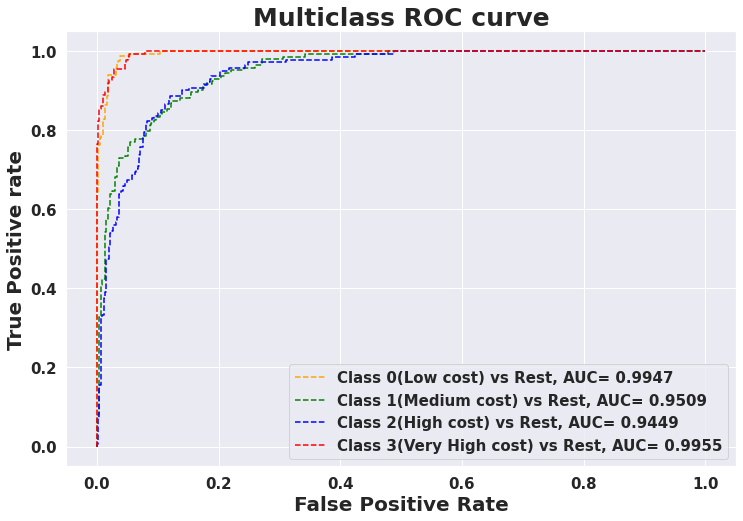

In [141]:
# Plot AUC ROC curve.
pred_prob = rfc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)